In [467]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   
sns.set(style="ticks")
sns.set(rc={'figure.figsize': (15, 7)})

In [455]:
project_path = '/home/parfait/Documents/MS BGD/INFMDI721_KIT_BigData/Kit_data/hackathon-futur-energy/'

In [456]:
data_rec = (project_path + "data/data_renewable_energy/renewable-energy-consumption.csv")
data_mrec = (project_path + "data/data_renewable_energy/modern-renewable-energy-consumption.csv")
data_rei = (project_path + "data/data_renewable_energy/renewable-energy-investment.csv")
data_iirebt = (project_path + "data/data_renewable_energy/investment-in-renewable-energy-by-technology.csv")

In [457]:
data_rec = pd.read_csv(data_rec, sep = ',')

In [458]:
data_mrec = pd.read_csv(data_mrec, sep = ',')

In [459]:
data_rei = pd.read_csv(data_rei, sep = ',')

In [460]:
data_iirebt = pd.read_csv(data_iirebt, sep = ',')

In [461]:
def clean_data(df):
    # rename columns:
    if 'Code' in df.columns:
        df['Code'] = df['Code'].fillna('INC')
    else:
        pass

    df = df.rename(columns={'Hydropower (terawatt-hours)': 'hydropower',
                            'Wind (terawatt-hours)': 'wind',
                            'Solar (terawatt-hours)': 'solar',
                            'Other renewables (modern biofuels; geothermal; wave & tidal) (terawatt-hours)': 'biomasse',
                           
                            'Traditional biofuels (terrawatt-hours)': 'biofuel',
                            'Other renewables (modern biofuels, geothermal, wave & tidal) (terawatt-hours)': 'biomasse',
                            'Wind (Terawatt-hours)': 'wind',
                            'Solar PV (Terawatt-hours)': 'solar',
                            'Hydropower (TWh)': 'hydropower',
                            'Investment in Renewables by Region (IRENA (2016)) (international-$)': 'investment',
                            'Marine Energy (USD)': 'price_marine',
                            'Geothermal Energy (USD)': 'price_geothermal',
                            'Small Hydropower (USD)': 'price_hydropower',
                            'Liquid Biofuels (USD)': 'price_biofuel',
                            'Biomass & Waste-to-Energy (USD)': 'price_biomasse',
                            'Wind Energy (USD)': 'price_wind',
                            'Solar Energy (USD)': 'price_solar'
                            
                           })
    
    df = df.fillna(0)    
    return df

In [462]:
data_mrec.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Wind (terawatt-hours),Solar (terawatt-hours),Other renewables (modern biofuels; geothermal; wave & tidal) (terawatt-hours)
0,Africa,NaN,1965,14.278806,0.0,0.0,0.0
1,Africa,NaN,1966,15.649049,0.0,0.0,0.0
2,Africa,NaN,1967,16.158333,0.0,0.0,0.0
3,Africa,NaN,1968,18.622983,0.0,0.0,0.0
4,Africa,NaN,1969,21.582897,0.0,0.0,0.0


## Energie par Année 

In [463]:
data_mrec_clean = clean_data(data_mrec)
data_mrec_clean_year = data_mrec_clean.groupby('Year').sum()
data_mrec_clean_year.head()

,hydropower,wind,solar,biomasse
Year,,,,
1965,3896.429990,0.0,0.0,23.011000
1966,4181.377635,0.0,0.0,28.677000
1967,4265.173095,0.0,0.0,30.054000
1968,4467.787121,0.0,0.0,33.835000
1969,4717.036515,0.0,0.0,36.987616


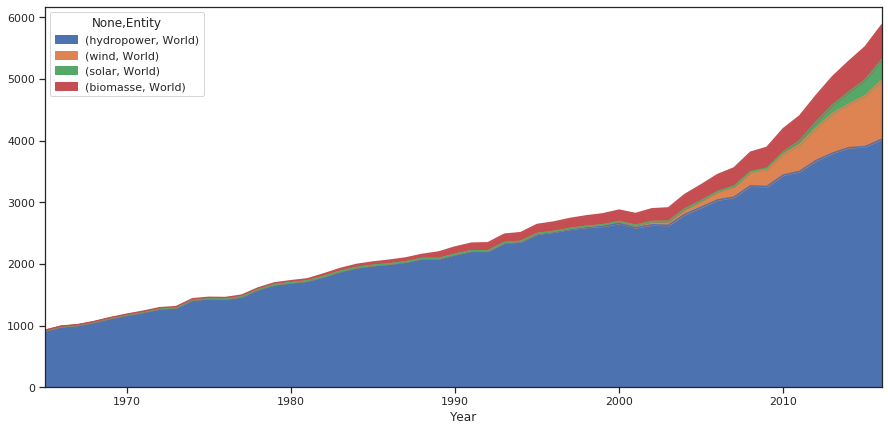

In [519]:
data_mrec_clean.head()
ax = data_mrec_clean[data_mrec_clean['Entity'] == "World"].set_index(['Year','Entity']).unstack().plot(y=['hydropower','wind', 'solar', 'biomasse' ] , kind='area')

In [ ]:
ax = data_rei_clean.set_index(['Year','Entity']).unstack().plot(y='investment', kind='area')

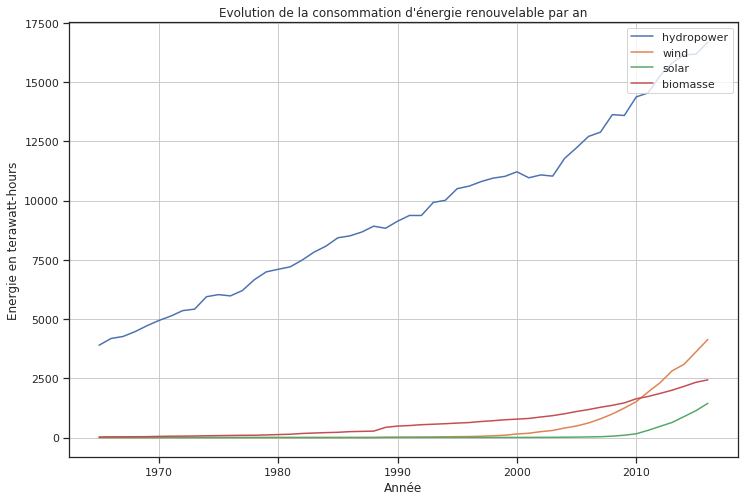

In [468]:
fig = plt.figure(figsize=(12, 8))
plt.plot(data_mrec_clean_year['hydropower'], label ='hydropower')
plt.plot(data_mrec_clean_year['wind'], label ='wind')
plt.plot(data_mrec_clean_year['solar'], label ='solar')
plt.plot(data_mrec_clean_year['biomasse'], label ='biomasse')
plt.legend(loc=1)
plt.title("Evolution de la consommation d'énergie renouvelable par an")
plt.xlabel("Année")
plt.ylabel("Energie en terawatt-hours")
plt.grid()
plt.show()

## Energie par Pays

In [465]:
data_mrec_clean_ent = data_mrec_clean.groupby('Entity').sum()
data_mrec_clean_ent.head()

,Year,hydropower,wind,solar,biomasse
Entity,,,,,
Africa,103506,3245.039018,44.323466,12.445055,67.138104
Algeria,103506,15.668190,0.039052,0.405542,0.000000
Argentina,103506,1157.977798,3.427932,0.070649,34.720448
Asia Pacific,103506,27513.699990,1474.406482,389.898645,2008.413464
Australia,103506,728.659567,79.923937,28.572717,66.555294


Text(0, 0.5, 'Energie en terawatt-hours')

<Figure size 864x576 with 0 Axes>

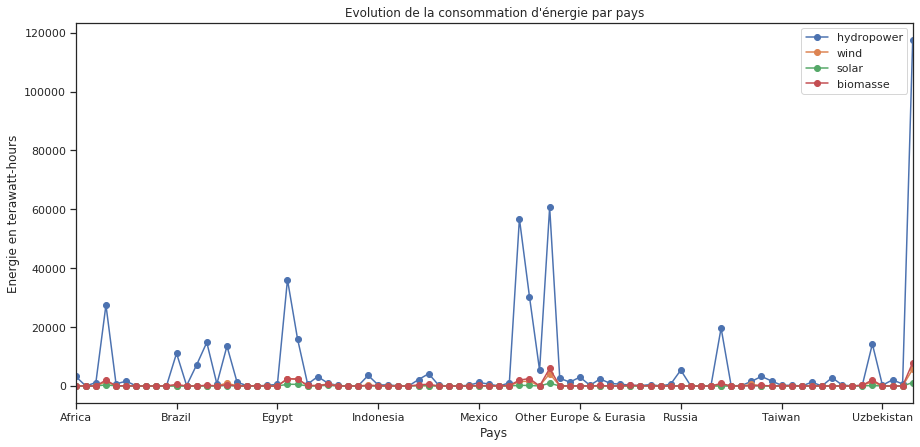

In [469]:
fig = plt.figure(figsize=(12, 8))
data_mrec_clean_ent.plot(y=['hydropower', 'wind', 'solar', 'biomasse'],  marker='o',)
plt.title("Evolution de la consommation d'énergie par pays")
plt.xlabel("Pays")
plt.ylabel("Energie en terawatt-hours")

## Energie par investissement

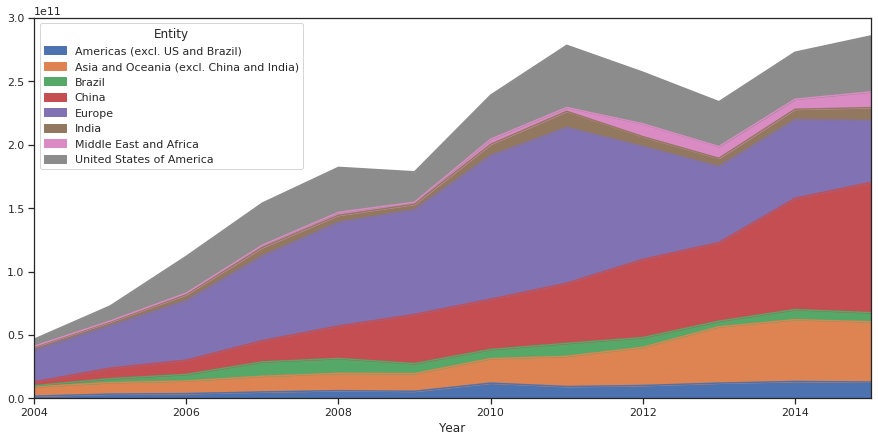

In [509]:
data_rei_clean = clean_data(data_rei)
ax = data_rei_clean.set_index(['Year','Entity']).unstack().plot(y='investment', kind='area')

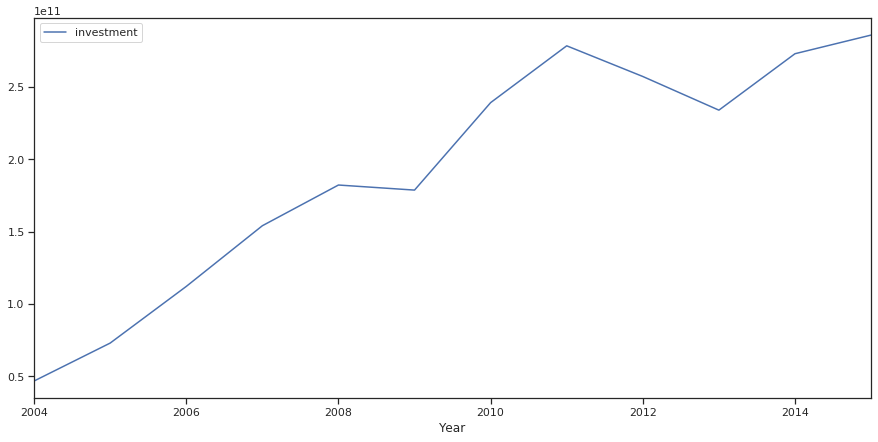

In [480]:
data_rei_clean.groupby('Year').sum().plot(y='investment')

In [483]:
data_mrec_clean_ent_pays.head()

hydropower  wind  solar  biomasse
Entity Year                                   
Africa 1965   14.278806   0.0    0.0       0.0
       1966   15.649049   0.0    0.0       0.0
       1967   16.158333   0.0    0.0       0.0
       1968   18.622983   0.0    0.0       0.0
       1969   21.582897   0.0    0.0       0.0

In [ ]:
## Renew Investment by